# Data Science for Cycling #3 - How To Calculate Elevation Difference and Distance From a GPX Route File
- Noteook 3/6
- Make sure to have the `haversine` package installed

        pip install haversine
        
- Let's import the libraries and tweak Matplotlib's default stylings:

In [1]:
# %pip uninstall haversine -y

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import haversine as hs
from gpxpy.geo import haversine_distance

plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

- Let's read in the dataset
- We've saved it to a CSV file in the first notebook:

In [3]:
route_df = pd.read_csv('../200km_route_df.csv', parse_dates=['time'])
route_df.head()

,latitude,longitude,elevation,time
0,48.089763,11.466253,522.4,2020-07-12 06:26:18+00:00
1,48.089763,11.466253,522.6,2020-07-12 06:26:19+00:00
2,48.089763,11.466253,522.6,2020-07-12 06:26:20+00:00
3,48.089763,11.466253,522.6,2020-07-12 06:26:21+00:00
4,48.089763,11.466253,522.6,2020-07-12 06:26:22+00:00


In [4]:
route_df.dtypes

latitude                 float64
longitude                float64
elevation                float64
time         datetime64[ns, UTC]
dtype: object

<br>

## Calculate elevation difference
- Put simply, you can use Python's `diff()` function to difference a column
- If you apply it to the Elevation column, you get the elevation difference between point T+1 and T
- The first differenced value will be Null, as there's no data point before it:

In [5]:
route_df['elevation_diff'] = route_df['elevation'].diff()

route_df.head()

,latitude,longitude,elevation,time,elevation_diff
0,48.089763,11.466253,522.4,2020-07-12 06:26:18+00:00,NaN
1,48.089763,11.466253,522.6,2020-07-12 06:26:19+00:00,0.2
2,48.089763,11.466253,522.6,2020-07-12 06:26:20+00:00,0.0
3,48.089763,11.466253,522.6,2020-07-12 06:26:21+00:00,0.0
4,48.089763,11.466253,522.6,2020-07-12 06:26:22+00:00,0.0


<br>

## Calculate distance between geolocations
- Calculating distance is tricky in this case
- It's best to use Google's API
    - But it's not free
    - And applies to road, which is limiting for let's say mountain bike trails
- The best free option is to use **haversine distance**
    - It calculates a great circle distance between two points on a sphere given their latitudes and longitudes
    - Learn more: https://en.wikipedia.org/wiki/Haversine_formula
- The GPX route measures 36,4 kilometers and has 835 data points
    - Which means there's on average 43,6 meters between two points
    - Haversine distance will be off, but hopefully not much
- Let's first define a function to calculate haversine distance:

In [6]:
haversine_distance

<function gpxpy.geo.haversine_distance(latitude_1: float, longitude_1: float, latitude_2: float, longitude_2: float) -> float>

In [7]:
# def haversine_distance(lat1, lon1, lat2, lon2) -> float:
#     distance = hs.haversine(
#         point1=(lat1, lon1),
#         point2=(lat2, lon2),
#         unit=hs.Unit.METERS
#     )
#     return np.round(distance, 2)

- Let's test it
- The example below measures the distance between the first and the second point:

In [8]:
haversine_distance(
    latitude_1=route_df.iloc[0]['latitude'],
    longitude_1=route_df.iloc[0]['longitude'],
    latitude_2=route_df.iloc[1000]['latitude'],
    longitude_2=route_df.iloc[1000]['longitude']
)

4602.503551959058

In [9]:
for l in ['latitude', 'longitude']:
    route_df[l+'_prev'] = route_df[l].shift(1)
route_df

,latitude,longitude,elevation,time,elevation_diff,latitude_prev,longitude_prev
0,48.089763,11.466253,522.4,2020-07-12 06:26:18+00:00,NaN,NaN,NaN
1,48.089763,11.466253,522.6,2020-07-12 06:26:19+00:00,0.2,48.089763,11.466253
2,48.089763,11.466253,522.6,2020-07-12 06:26:20+00:00,0.0,48.089763,11.466253
3,48.089763,11.466253,522.6,2020-07-12 06:26:21+00:00,0.0,48.089763,11.466253
4,48.089763,11.466253,522.6,2020-07-12 06:26:22+00:00,0.0,48.089763,11.466253
...,...,...,...,...,...,...,...
31197,48.088162,11.460104,531.4,2020-07-12 16:38:27+00:00,0.0,48.088142,11.460169
31198,48.088181,11.460041,531.4,2020-07-12 16:38:28+00:00,0.0,48.088162,11.460104
31199,48.088197,11.459976,531.4,2020-07-12 16:38:29+00:00,0.0,48.088181,11.460041
31200,48.088211,11.459913,531.8,2020-07-12 16:38:30+00:00,0.4,48.088197,11.459976


In [10]:
route_df['distance_delta'] = route_df.apply(lambda x: haversine_distance(x['latitude'], x['longitude'], x['latitude_prev'], x['longitude_prev']), axis=1)

In [11]:
route_df

,latitude,longitude,elevation,time,elevation_diff,latitude_prev,longitude_prev,distance_delta
0,48.089763,11.466253,522.4,2020-07-12 06:26:18+00:00,NaN,NaN,NaN,NaN
1,48.089763,11.466253,522.6,2020-07-12 06:26:19+00:00,0.2,48.089763,11.466253,0.000000
2,48.089763,11.466253,522.6,2020-07-12 06:26:20+00:00,0.0,48.089763,11.466253,0.000000
3,48.089763,11.466253,522.6,2020-07-12 06:26:21+00:00,0.0,48.089763,11.466253,0.000000
4,48.089763,11.466253,522.6,2020-07-12 06:26:22+00:00,0.0,48.089763,11.466253,0.000000
...,...,...,...,...,...,...,...,...
31197,48.088162,11.460104,531.4,2020-07-12 16:38:27+00:00,0.0,48.088142,11.460169,5.321514
31198,48.088181,11.460041,531.4,2020-07-12 16:38:28+00:00,0.0,48.088162,11.460104,5.140008
31199,48.088197,11.459976,531.4,2020-07-12 16:38:29+00:00,0.0,48.088181,11.460041,5.151119
31200,48.088211,11.459913,531.8,2020-07-12 16:38:30+00:00,0.4,48.088197,11.459976,4.937101


### Timedeltas

In [12]:
route_df['time_delta'] = route_df['time'].diff()
route_df.head()

,latitude,longitude,elevation,time,elevation_diff,latitude_prev,longitude_prev,distance_delta,time_delta
0,48.089763,11.466253,522.4,2020-07-12 06:26:18+00:00,NaN,NaN,NaN,NaN,NaT
1,48.089763,11.466253,522.6,2020-07-12 06:26:19+00:00,0.2,48.089763,11.466253,0.0,0 days 00:00:01
2,48.089763,11.466253,522.6,2020-07-12 06:26:20+00:00,0.0,48.089763,11.466253,0.0,0 days 00:00:01
3,48.089763,11.466253,522.6,2020-07-12 06:26:21+00:00,0.0,48.089763,11.466253,0.0,0 days 00:00:01
4,48.089763,11.466253,522.6,2020-07-12 06:26:22+00:00,0.0,48.089763,11.466253,0.0,0 days 00:00:01


### Interlude - check elevation for anomalies

In [13]:
route_df.loc[route_df['elevation'] > 1250]

,latitude,longitude,elevation,time,elevation_diff,latitude_prev,longitude_prev,distance_delta,time_delta
18005,47.750638,11.782512,1285.2,2020-07-12 12:18:31+00:00,510.6,47.750639,11.782500,0.905032,0 days 00:01:01
21097,47.851709,11.696697,2508.8,2020-07-12 13:27:29+00:00,1825.8,47.851709,11.696697,0.000000,0 days 00:05:02
21098,47.851709,11.696697,1556.0,2020-07-12 13:27:30+00:00,-952.8,47.851709,11.696697,0.000000,0 days 00:00:01


look also at the differences:

In [14]:
route_df.loc[(route_df['elevation_diff']) > 5]

,latitude,longitude,elevation,time,elevation_diff,latitude_prev,longitude_prev,distance_delta,time_delta
9938,47.711979,11.727265,877.2,2020-07-12 09:15:23+00:00,184.0,47.712608,11.725676,138.087964,0 days 00:02:05
18005,47.750638,11.782512,1285.2,2020-07-12 12:18:31+00:00,510.6,47.750639,11.782500,0.905032,0 days 00:01:01
21097,47.851709,11.696697,2508.8,2020-07-12 13:27:29+00:00,1825.8,47.851709,11.696697,0.000000,0 days 00:05:02
22132,47.896499,11.659559,1224.4,2020-07-12 14:00:58+00:00,559.2,47.896499,11.659559,0.000000,0 days 00:13:36
24258,47.937795,11.529160,986.8,2020-07-12 14:39:05+00:00,368.8,47.937676,11.527556,120.352983,0 days 00:02:37
26220,47.978601,11.466312,778.6,2020-07-12 15:14:30+00:00,252.0,47.978601,11.466312,0.000000,0 days 00:02:43


500 meters in 1 minute / 1 meter horizontal? 

In [15]:
route_df.loc[(route_df['elevation_diff']) < -10]

,latitude,longitude,elevation,time,elevation_diff,latitude_prev,longitude_prev,distance_delta,time_delta
9939,47.711968,11.727297,785.2,2020-07-12 09:15:24+00:00,-92.0,47.711979,11.727265,2.691547,0 days 00:00:01
9940,47.711954,11.727362,738.6,2020-07-12 09:15:25+00:00,-46.6,47.711968,11.727297,5.111999,0 days 00:00:01
9941,47.711941,11.727440,714.8,2020-07-12 09:15:26+00:00,-23.8,47.711954,11.727362,6.018936,0 days 00:00:01
9942,47.711932,11.727525,702.8,2020-07-12 09:15:27+00:00,-12.0,47.711941,11.727440,6.445038,0 days 00:00:01
18006,47.750645,11.782477,1032.0,2020-07-12 12:18:32+00:00,-253.2,47.750638,11.782512,2.733071,0 days 00:00:01
18007,47.750645,11.782477,905.4,2020-07-12 12:18:33+00:00,-126.6,47.750645,11.782477,0.000000,0 days 00:00:01
18008,47.750681,11.782427,841.6,2020-07-12 12:18:34+00:00,-63.8,47.750645,11.782477,5.483165,0 days 00:00:01
18009,47.750710,11.782401,809.2,2020-07-12 12:18:35+00:00,-32.4,47.750681,11.782427,3.769436,0 days 00:00:01
18010,47.750740,11.782378,792.6,2020-07-12 12:18:36+00:00,-16.6,47.750710,11.782401,3.757164,0 days 00:00:01
21098,47.851709,11.696697,1556.0,2020-07-12 13:27:30+00:00,-952.8,47.851709,11.696697,0.000000,0 days 00:00:01


freefalling is ~50m/s... 

### Clean data: bfill values

In [16]:
route_df.loc[~route_df['elevation_diff'].between(-10, 3) , 'elevation'] = np.nan

route_df['elevation']=route_df['elevation'].fillna(method='bfill')

In [17]:
# set values again
route_df['elevation_diff'] = route_df['elevation'].diff()

<AxesSubplot:>

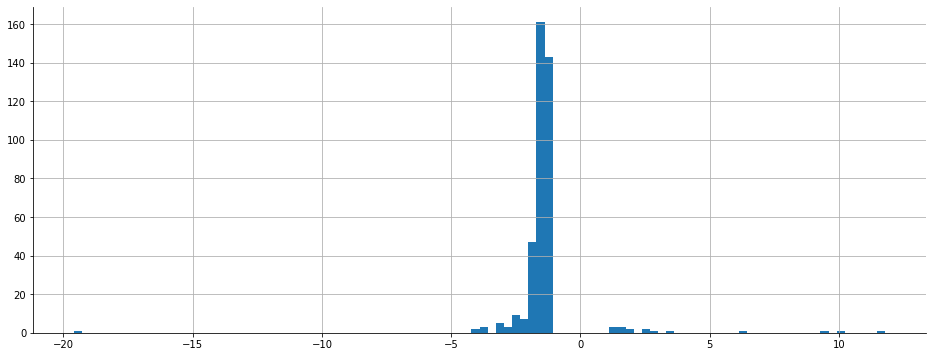

In [18]:
(route_df
 .loc[np.abs(route_df['elevation_diff']) > 1]
 ['elevation_diff']
 .hist(bins=100)
)

### Total Uphill
- How to calculate it?
- Simple - subset the column so only the rows with positive `elevation_diff` are kept, and then calculate the sum of the elevation difference:

In [19]:
route_df[route_df['elevation_diff'] >= 0]['elevation_diff'].sum()

2491.000000000001

- The official Strava route states there's 
> 2.186 meters of elevation,

so we're a bit off... not only explainable by faulty data left, since

In [20]:
(route_df
 .loc[(route_df['elevation_diff']) > 1]
 ['elevation_diff']
 .sum()
)

61.399999999999864

### Total Distance
- To calculate the total distance, simply sum the `distance` column:

In [21]:
route_df['distance_delta'].sum()/1000

206.72024094476626

- The official Strava route states
> 207,06 km

- we're dead on even with the simple haversine distance calculation!

<br>

## Visualize the Elevation profile
- Let's see if our calculations make sense by visualizing the elevation profile
    - Shows meters of climbing at different distances
- To make things simpler, we'll calculate a cumulative sum for elevation and distance

In [22]:
route_df['cum_elevation'] = route_df['elevation_diff'].cumsum()
route_df['cum_distance'] = route_df['distance_delta'].cumsum()

route_df.head()

,latitude,longitude,elevation,time,elevation_diff,latitude_prev,longitude_prev,distance_delta,time_delta,cum_elevation,cum_distance
0,48.089763,11.466253,522.6,2020-07-12 06:26:18+00:00,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,48.089763,11.466253,522.6,2020-07-12 06:26:19+00:00,0.0,48.089763,11.466253,0.0,0 days 00:00:01,0.0,0.0
2,48.089763,11.466253,522.6,2020-07-12 06:26:20+00:00,0.0,48.089763,11.466253,0.0,0 days 00:00:01,0.0,0.0
3,48.089763,11.466253,522.6,2020-07-12 06:26:21+00:00,0.0,48.089763,11.466253,0.0,0 days 00:00:01,0.0,0.0
4,48.089763,11.466253,522.6,2020-07-12 06:26:22+00:00,0.0,48.089763,11.466253,0.0,0 days 00:00:01,0.0,0.0


- Let's get rid of the NaNs
- We'll fill the NaNs with zeros, as that makes more sense for this dataset:

In [23]:
route_df.columns

Index(['latitude', 'longitude', 'elevation', 'time', 'elevation_diff',
       'latitude_prev', 'longitude_prev', 'distance_delta', 'time_delta',
       'cum_elevation', 'cum_distance'],
      dtype='object')

In [24]:
columns = [c for c in route_df if c != 'time_delta']
route_df[columns] = route_df[columns].fillna(0)

route_df.head()

,latitude,longitude,elevation,time,elevation_diff,latitude_prev,longitude_prev,distance_delta,time_delta,cum_elevation,cum_distance
0,48.089763,11.466253,522.6,2020-07-12 06:26:18+00:00,0.0,0.000000,0.000000,0.0,NaT,0.0,0.0
1,48.089763,11.466253,522.6,2020-07-12 06:26:19+00:00,0.0,48.089763,11.466253,0.0,0 days 00:00:01,0.0,0.0
2,48.089763,11.466253,522.6,2020-07-12 06:26:20+00:00,0.0,48.089763,11.466253,0.0,0 days 00:00:01,0.0,0.0
3,48.089763,11.466253,522.6,2020-07-12 06:26:21+00:00,0.0,48.089763,11.466253,0.0,0 days 00:00:01,0.0,0.0
4,48.089763,11.466253,522.6,2020-07-12 06:26:22+00:00,0.0,48.089763,11.466253,0.0,0 days 00:00:01,0.0,0.0


- We'll save this dataset for the upcoming notebooks:

In [25]:
route_df.to_csv('../200km_route_df_elevation_distance.csv', index=False)

- Finally, let's use Matplotlib to plot the elevation profile:

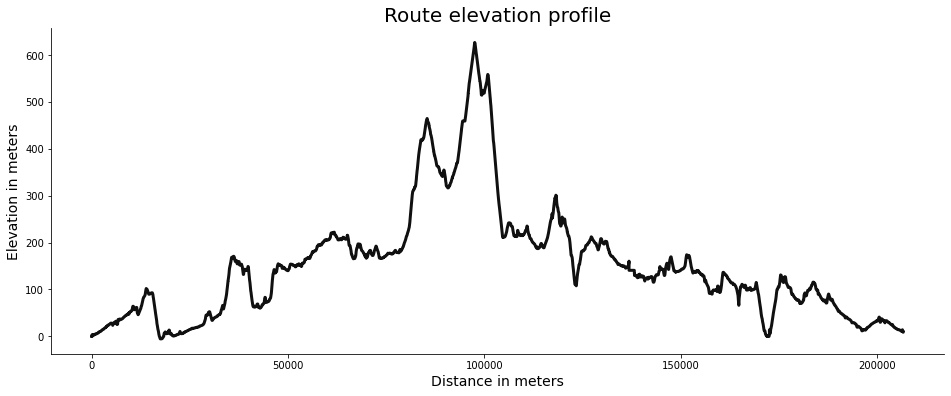

In [26]:
plt.plot(route_df['cum_distance'], route_df['cum_elevation'], color='#101010', lw=3)
plt.title('Route elevation profile', size=20)
plt.xlabel('Distance in meters', size=14)
plt.ylabel('Elevation in meters', size=14);
#plt.savefig('fig.jpg', dpi=300, bbox_inches='tight')